In [ ]:
conda install -c conda-forge mscorefonts

In [1]:
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import astropy
from astropy.table import Table,vstack, Column
from os import listdir
from os.path import isfile, join
import math
import scipy
from scipy import stats
from astropy.stats import binom_conf_interval
from astropy.io import ascii
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#matplotlib.rcParams['font.sans-serif'] = "Helvetica"

In [2]:

#mpl.rcParams['figure.dpi']= 100
plt.rcParams.update({'font.size': 12})

In [3]:
def useLatex():
    # Setup to use LaTeX in figure labels
    plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "text.latex.preamble": r"\usepackage{amsmath, amssymb}"})
    plt.rcParams.update({'font.size': 16})


In [8]:
ext = 'MPhys/gpz_catalogues/gpz_catalogues/'
#pred_ext = 'MPhys/gpz_catalogues/gpz_catalogues/reg_z_split/highz/PRED'
#train_ext = 'MPhys/gpz_catalogues/gpz_catalogues/reg_z_split/highz/TRAIN'

#predfiles = [f for f in listdir(f'{pred_ext}') if isfile(join(f'{pred_ext}', f))]
#trainfiles = [f for f in listdir(f'{train_ext}') if isfile(join(f'{train_ext}', f))]
#predfiles = [f for f in listdir('PRED/PRED') if isfile(join('PRED/PRED', f))]

In [9]:
#predfiles.sort()

#predfiles


In [10]:
for i in predfiles:
    b= [i.split('_')[2]for i in trainfiles]
    #new=[i.split('_')[9] for i in trainfiles]
#print(b)
for j in b:
    filt = [j.split('.')[0]for j in b]
   # filt = [j.split('-')[1]for j in b]
    
#print(base)
filt.sort()
filt

NameError: name 'predfiles' is not defined

# Redshift Plotting 
### z split 

In [11]:
#PREDICTION FILES
pred_size_highz = predfiles = [f for f in listdir(f'{ext}size_z_split/highz/PRED/new') if isfile(join(f'{ext}size_z_split/highz/PRED/new', f))]
pred_size_highz.sort()

pred_size_lowz = predfiles = [f for f in listdir(f'{ext}size_z_split/lowz/PRED/new') if isfile(join(f'{ext}size_z_split/lowz/PRED/new', f))]
pred_size_lowz.sort()




pred_nosize_highz  = [f for f in listdir(f'{ext}reg_z_split/highz/PRED/new') if isfile(join(f'{ext}reg_z_split/highz/PRED/new', f))]
pred_nosize_highz.sort()

pred_nosize_lowz = [f for f in listdir(f'{ext}reg_z_split/lowz/PRED/new') if isfile(join(f'{ext}reg_z_split/lowz/PRED/new', f))]
pred_nosize_lowz.sort()
pred_size_highz

['pred_highz_bc_size_inc.cat',
 'pred_highz_f090w_inc_size_inc.cat',
 'pred_highz_f125w_size_inc.cat',
 'pred_highz_f140w_size_inc.cat',
 'pred_highz_f150w-clear_size_inc.cat',
 'pred_highz_f160w_size_inc.cat',
 'pred_highz_f410m-clear_size_inc.cat',
 'pred_highz_f435w_size_inc.cat',
 'pred_highz_f606w_size_inc.cat',
 'pred_highz_f814w_size_inc.cat',
 'pred_highz_ic_size_inc.cat']

In [12]:
#OUTPUT CATALOGUES
cat_size_highz = [f for f in listdir('MPhys/gpz_files_new/cats/highz/size') if isfile(join('MPhys/gpz_files_new/cats/highz/size', f))]
cat_size_highz.sort()

cat_size_lowz =  [f for f in listdir('MPhys/gpz_files_new/cats/lowz/size') if isfile(join('MPhys/gpz_files_new/cats/lowz/size', f))]
cat_size_lowz.sort()

cat_no_size_lowz = [f for f in listdir('MPhys/gpz_files_new/cats/lowz') if isfile(join('MPhys/gpz_files_new/cats/lowz', f))]
cat_no_size_lowz.sort()

cat_no_size_highz = [f for f in listdir('MPhys/gpz_files_new/cats/highz') if isfile(join('MPhys/gpz_files_new/cats/highz', f))]
cat_no_size_highz.sort()
cat_size_lowz

['bc.cat',
 'f090w.cat',
 'f125w.cat',
 'f140w.cat',
 'f150w-clear.cat',
 'f160w.cat',
 'f410m-clear.cat',
 'f435w.cat',
 'f606w.cat',
 'f814w.cat',
 'ic.cat']

In [30]:
t= Table.read(f'{ext}reg_z_split/highz/PRED/pred_highz_bc.cat',format = 'ascii.commented_header')
print(np.max(t['z_spec']))

11.671


In [13]:
ls = ['bc','f090w','f125w','f140w','f150w','f160w','f410m','f435w','f606w','f814w','ic']
#ls=['bc']#,'f160w','f435w']

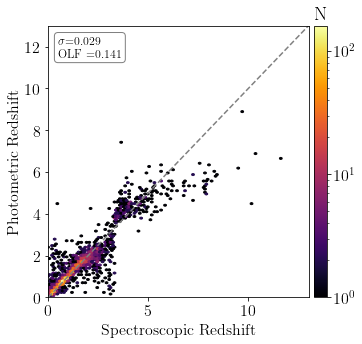

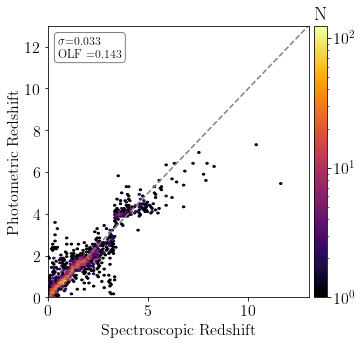

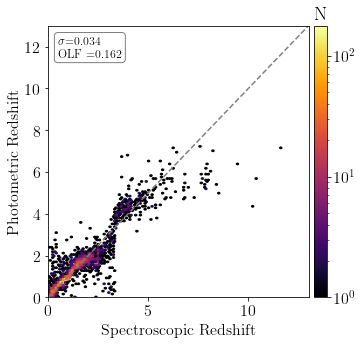

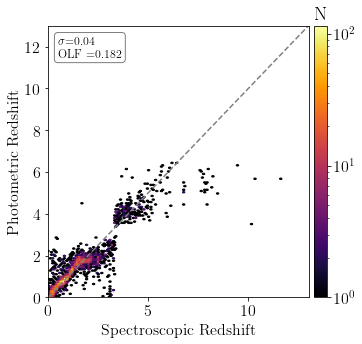

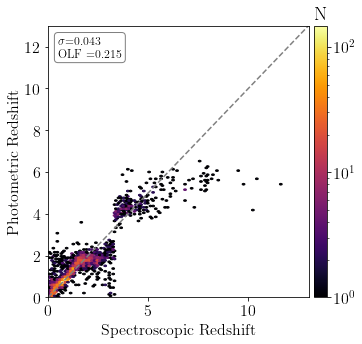

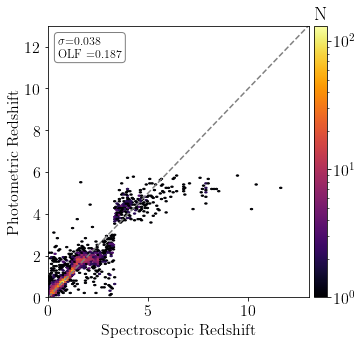

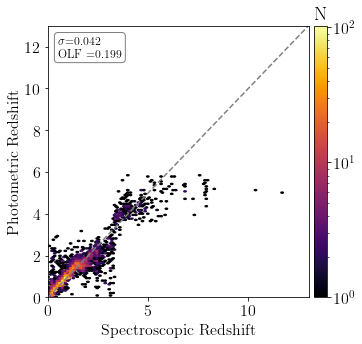

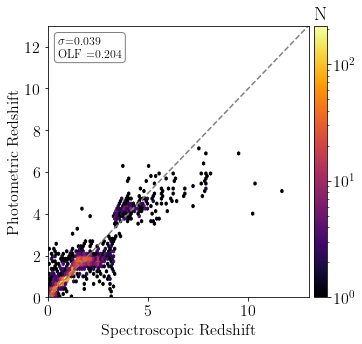

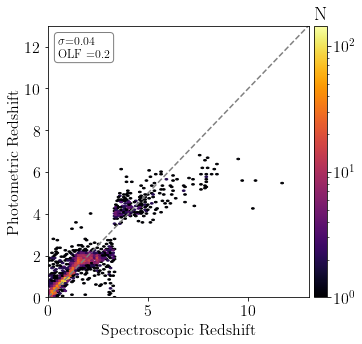

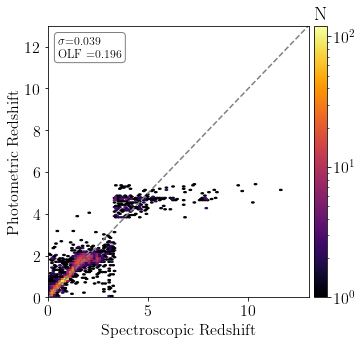

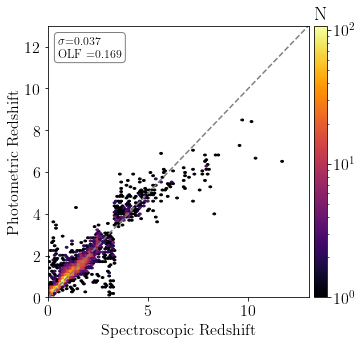

In [116]:

for i in range(len(ls)):
#for i in range(0,1):
    fig,ax = plt.subplots(1,1,figsize = (5,5))
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    #print(pred_nosize_highz[i],cat_no_size_highz[i],cat_no_size_lowz[i],pred_nosize_lowz[i])
    highp = Table.read(f'{ext}reg_z_split/highz/PRED/new/{pred_nosize_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}reg_z_split/lowz/PRED/new/{pred_nosize_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/{cat_no_size_highz[i]}',format = 'ascii')
    #print(cat_no_size_highz[i])
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/{cat_no_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out= vstack([lowcat,highcat])
    useLatex()
    
    
    x = np.linspace(0,13)
    
    
#olf and sigma 
    for v in range(len(pred)):
        delta_z.append(abs(float(gpz_out['col2'][v])-float(pred['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred['z_spec'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for j in range(len(pred)):    
        ins.append(delta_z[j]/(1+float(pred['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred)
    
    err= binom_conf_interval(outlier_frac,len(pred))
    outlier_frac_sig =k/len(pred)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
   
    plt.text(0.5, 12.5,f'$\sigma$={np.round(sig_nmad,3)} \n OLF ={np.round(outlier_frac,3)}',  fontsize=12,
        verticalalignment='top', bbox=props)
 
    ax.plot(x,x,color = 'grey',linestyle = '--')
    #plt.colorbar(label='N')
    ax.set_xlabel('Spectroscopic Redshift')
    ax.set_ylabel('Photometric Redshift')
   # plt.axis('square')
   
    #plt.title(f'Base Filters Zsplit')
    ax.set_xlim(0,13)
    ax.set_ylim(0,13)
    
    im1 = ax.hexbin(pred['z_spec'],gpz_out['col2'],cmap = 'inferno',bins='log')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')
    
    plt.savefig(f'MPhys/gpz_files_new/hexplots/zsplit/zsplit_{ls[i]}_basic.pdf',bbox_inches='tight')
    plt.show()
    #plt.close()

    

### Regular 

In [14]:
pred_nosize = [f for f in listdir(f'{ext}reg/PRED/new') if isfile(join(f'{ext}reg/PRED/new', f))]
pred_nosize.sort()

cat_no_size = [f for f in listdir('MPhys/gpz_files_new/cats/all') if isfile(join('MPhys/gpz_files_new/cats/all', f))]
cat_no_size.sort()

pred_size = [f for f in listdir(f'{ext}size/PRED/new') if isfile(join(f'{ext}size/PRED/new', f))]
pred_size.sort()

cat_size = [f for f in listdir('MPhys/gpz_files_new/cats/all/size') if isfile(join('MPhys/gpz_files_new/cats/all/size', f))]
cat_size.sort()
cat_size

['bc.cat',
 'f090w.cat',
 'f125w.cat',
 'f140w.cat',
 'f150w-clear.cat',
 'f160w.cat',
 'f410m-clear.cat',
 'f435w.cat',
 'f606w.cat',
 'f814w.cat',
 'ic.cat']

pred_bc.cat bc.cat


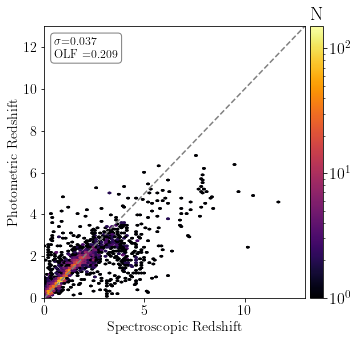

pred_f090w_inc.cat f090w.cat


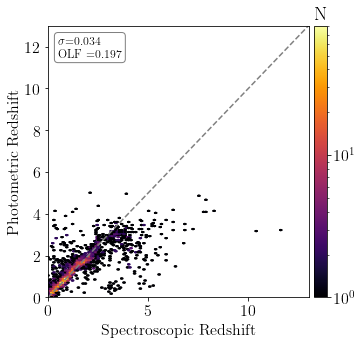

pred_f125w.cat f125w.cat


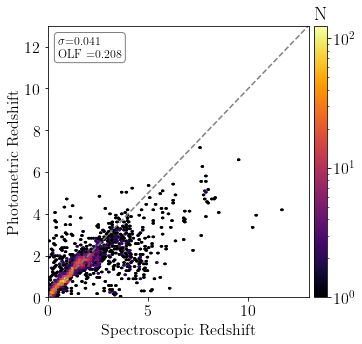

pred_f140w.cat f140w.cat


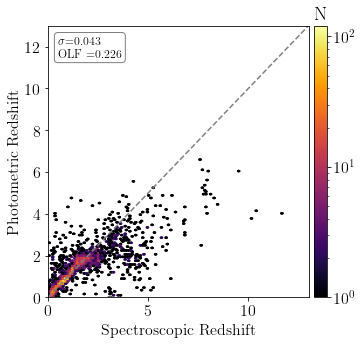

pred_f150w-clear.cat f150w-clear.cat


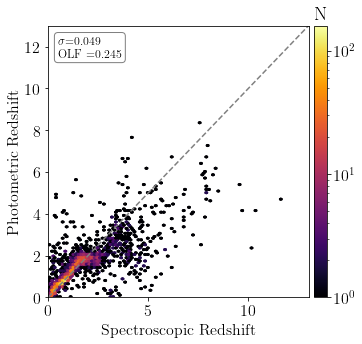

pred_f160w.cat f160w.cat


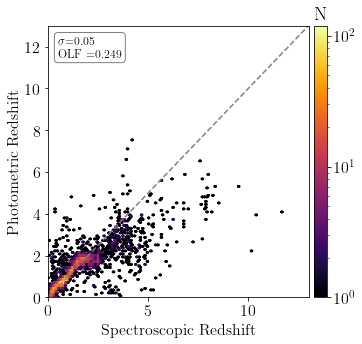

pred_f410m-clear.cat f410m-clear.cat


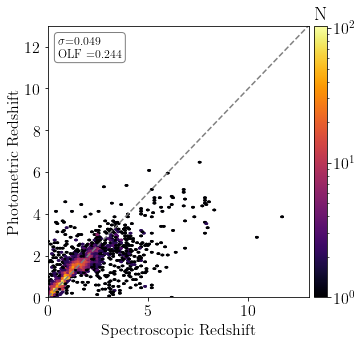

pred_f435w.cat f435w.cat


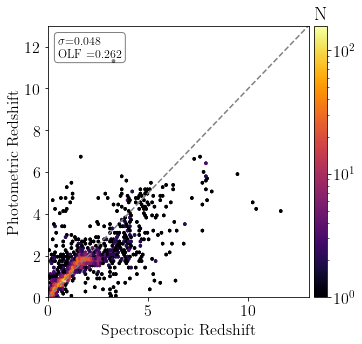

pred_f606w.cat f606w.cat


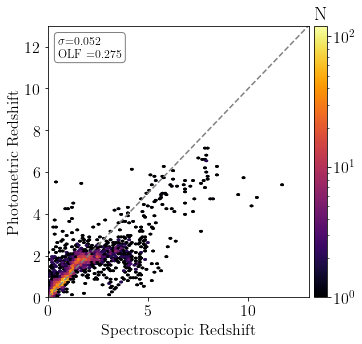

pred_f814w.cat f814w.cat


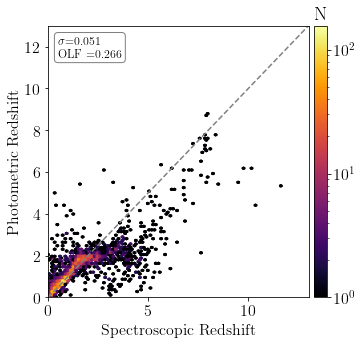

pred_ic.cat ic.cat


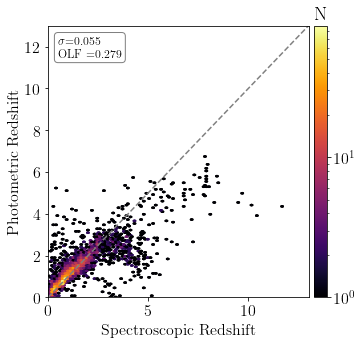

In [145]:

for i in range(len(ls)):
#for i in range(0,1):
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    
    pred_all = Table.read(f'{ext}reg/PRED/new/{pred_nosize[i]}', format = 'ascii.commented_header')
    pred_all.sort('id')
    print(pred_nosize[i], cat_no_size[i])
    gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/{cat_no_size[i]}',format = 'ascii')
    #print(cat_no_size_highz[i])
    gpz_out_all.sort('col1')
    useLatex()
    plt.hexbin(pred_all['z_spec'],gpz_out_all['col2'],cmap = 'inferno',bins='log')
    x = np.linspace(0,13)
    
    
#olf and sigma 
    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for j in range(len(pred_all)):    
        ins.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred_all)
    
    err= binom_conf_interval(outlier_frac,len(pred_all))
    outlier_frac_sig =k/len(pred_all)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred_all))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(0.5, 12.5,f'$\sigma$={np.round(sig_nmad,3)} \n OLF ={np.round(outlier_frac,3)}',  fontsize=12,
        verticalalignment='top', bbox=props)
   # print(outlier_frac)
    plt.plot(x,x,color = 'grey',linestyle = '--')
    
    plt.xlabel('Spectroscopic Redshift')
    plt.ylabel('Photometric Redshift')
    
    #plt.title(f'Base Filters Zsplit')
    plt.xlim(0,13)
    plt.ylim(0,13)
    im1 = ax.hexbin(pred_all['z_spec'],gpz_out_all['col2'],cmap = 'inferno',bins='log')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')
    plt.savefig(f'MPhys/gpz_files_new/hexplots/{ls[i]}_basic.pdf',bbox_inches='tight')
    plt.show()
    #plt.close()

    

In [54]:
t = Table.read('MPhys/gpz_catalogues/gpz_catalogues/size/PRED/pred_bc_size.cat', format='ascii.commented_header')
t1 = Table.read('MPhys/gpz_catalogues/gpz_catalogues/size/PRED/new/pred_bc_size_inc.cat', format='ascii.commented_header')
t1

field,id,ra,dec,z_spec,lupt_f115w-clear,lupterr_f115w-clear,lupt_f200w-clear,lupterr_f200w-clear,lupt_f356w-clear,lupterr_f356w-clear,lupt_f444w-clear,lupterr_f444w-clear,lupt_f444w-clear_size,lupterr_f444w-clear_size
str13,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
cosmos_east,345540,150.15802019170673,2.298961777388468,2.1756,24.40498487843772,0.007993048505615679,23.69637695404168,0.0034185964704931604,23.575612036833903,0.0026244975138596323,23.52396575195114,0.0030582194680193733,1.0072019097321816,0.916815868342582
cosmos_east,345553,150.16767568792758,2.298754419101821,1.8306,26.216198000057506,0.05235742217647749,23.445830759234987,0.0032509136516326296,21.762496135446046,0.0009888050933450582,21.410430133168326,0.0008824453666906513,1.0173414673177579,1.1394836019484473
cosmos_east,345558,150.14313213438086,2.299058913982601,1.9125,24.779830629707902,0.01031576187021429,24.273057555882815,0.005016945747569197,24.20446264427696,0.003689309786420275,24.18236054244552,0.004660560236484636,1.0110539881217517,0.965785730617171
cosmos_east,345585,150.1359978768402,2.298920447845204,1.5168,24.211048172024697,0.007458342570037572,24.166665109211692,0.005351321434616974,24.176469343034476,0.0037834127549412236,24.184293590021944,0.005017080013591566,1.012677858957675,0.9952619024950061
cosmos_east,345586,150.13559647617774,2.29888869762701,1.517,22.878467019146896,0.002436331932155976,22.418173906463043,0.0014884591841880922,22.01354401925821,0.0010774476771938126,21.93031546096416,0.0011150562501338528,1.0112050657609306,1.0521916039706785
cosmos_east,345594,150.2006557147102,2.2989958531848633,0.9779,23.118246077978597,0.005146376667914402,22.583501089135027,0.0024014267849262086,22.385855109699573,0.001673412232418988,22.673467772772625,0.0026027079976296123,1.0181050602477761,1.06990798045614
cosmos_east,345603,150.16274450503136,2.299171391259018,1.9982,24.7295329612774,0.015704766550390405,23.230528982024374,0.0031002377568594133,22.544155750036555,0.0015094230283148693,22.411759390573188,0.0015855504003164083,1.0083910208958151,0.9678287701624497
cosmos_east,345607,150.120032751076,2.2991916318405177,1.0087,25.2899208159298,0.023903379009317386,24.89218364164792,0.011669116644345863,24.826728037076084,0.007603941114839984,25.041295940916058,0.01446308011939211,1.023070528747127,1.2075112193209279
cosmos_east,345609,150.18732171898367,2.299134031157791,0.5099,22.85334288031924,0.002653636588356684,22.071752721242056,0.0012773476933559868,22.240287339031507,0.0012850657034379558,22.46738059861194,0.0016713944636486849,1.0174803388247773,1.1178146797839448


## Basis Functions Redshift Plotting 


In [ ]:
nbf = [10,100,500]
from mpl_toolkits.axes_grid1 import make_axes_locatable

NameError: name 'nbf' is not defined

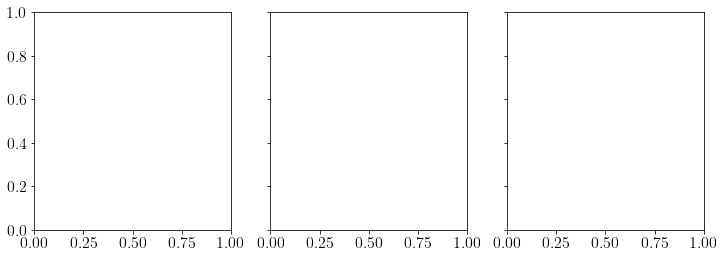

In [15]:
fig,ax = plt.subplots(1,3,figsize = (12,4),sharey=True)
zspec_lst =[]
file_zspec = open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']

for _ in range(1):
    next(file_zspec)
for line in file_zspec:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_lst.append(float(tokens[10]))
file_zspec.close()

for i,j in zip(range(len(nbf)),range(0,3)):
    

    zphot = []
    error=[]

    file = open(f'MPhys/parameter_files/gpz_{nbf[i]}_seq_cut.cat','r')
    #file = open(f'MPhys/gpz_files/gpz_jwst_base_filters_lowz.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot.append(float(tokens_numbf[0]))
        error.append(float(tokens_numbf[1]))
    file.close()
    
    m=0
    k=0
    ins=[]
    delta_z=[]
    outliers=[]
    for v in range(len(zphot)):
        delta_z.append(abs(float(zphot[v])-float(zspec_lst[v])))
        outliers.append(float(delta_z[v])/(1+float(zspec_lst[v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    for k in range(len(zphot)):    
        ins.append(delta_z[k]/(1+float(zspec_lst[k])))

        if abs(outliers[k])>0.15:
            m+=1
        if abs(outliers[k])>(3*sig_nmad):
            k+=1

           # if c!=0:
    outlier_frac = m/len(zphot)
    
    err= binom_conf_interval(outlier_frac,len(zphot))
    outlier_frac_sig =k/len(zphot)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(zphot))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax[j].text(1.15, 1.5,f'$\sigma$={sig_nmad:.3f} \n OLF ={outlier_frac:.3f}',  fontsize=8,
        verticalalignment='top', bbox=props)
    
    
    
    
    x = np.linspace(np.min(zspec_lst),1.3)
    useLatex()
    ax[j].plot(x,x,color = '0.5',linestyle = '--')
    im1 = ax[j].hexbin(zspec_lst, zphot,cmap = 'inferno',bins='log',mincnt=1)
    ax[j].set_xlabel('Spectroscopic Redshift')
    ax[0].set_ylabel('Photometric Redshift')
    ax[j].set_title(f'{nbf[i]}')
  
    #plt.title(f'{base[i]}->{filt[i]} Low Redshift Split (with size)')
    #plt.axis('equal')
    ax[j].set_aspect('equal')
    ax[j].set_xlim(0,1.6)
    ax[j].set_ylim(0,1.6)
    #cbar = plt.colorbar(label='N')
    divider = make_axes_locatable(ax[j])
    cax = divider.append_axes('right', size='5%', pad=0.075)
    cb = fig.colorbar(im1, cax=cax, orientation='vertical')
    cb.ax.set_title('N')

plt.savefig(f'MPhys/parameter_plots/sdss_nbf_comp_seq_cut.pdf', bbox_inches='tight')
    #plt.show()
    #plt.close()
plt.show()


# Outlier Fraction 


In [5]:
l= np.arange(0,1.2,0.1)
h=np.arange(0.4,1.2,0.1)
print(l)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]


### z split

In [6]:
for i in range(len(ls)):
    p=0
    x=[]     

    delta_z = []
    outliers = []

    logz = []
    
    
    
   # os.remove(f'MPhys/gpz_files/olf/auto/redshift_binned_olf_no_size_{ls[i]}.txt')
    file_text = open(f'MPhys/gpz_files_new/olf/size_z_split/txt_files/olf_{ls[i]}_size_zsplit.txt','a')
 
    
    highp = Table.read(f'{ext}size_z_split/highz/PRED/{pred_size_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}size_z_split/lowz/PRED/{pred_size_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/size/{cat_size_highz[i]}',format = 'ascii')
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/size/{cat_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out= vstack([lowcat,highcat])

    

    for v in range(len(pred)):
        delta_z.append(abs(float(gpz_out['col2'][v])-float(pred['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred['z_spec'][v])))
        logz.append(np.log10(1+pred['z_spec'][v]))

    ###


    while p<len(l):
        m=0
        k=0
        c=0
        for j in range(len(logz)):

            if l[p]<=logz[j]<=l[p]+0.1:
                    #print(logz[j])
                c+=1
                x.append(delta_z[j]/(1+float(pred['z_spec'][j])))
                sig_nmad = scipy.stats.median_abs_deviation(x)
        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:



                if abs(outliers[j])>0.15:
                    m+=1
                if abs(outliers[j])>(3*sig_nmad):
                    k+=1

        if c!=0:
            outlier_frac = m/c
            print(outlier_frac)
            err= binom_conf_interval(outlier_frac,c)
            outlier_frac_sig =k/c
            err_three_sig= binom_conf_interval(outlier_frac_sig,c)


        file_text.write(str(l[p])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','+str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+'\n')
        p+=1
        #file_text.close()

    #####


    file_text.close()   

       # w+=1

NameError: name 'ls' is not defined

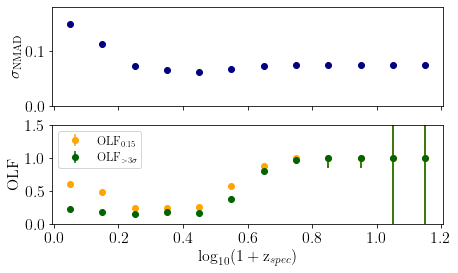

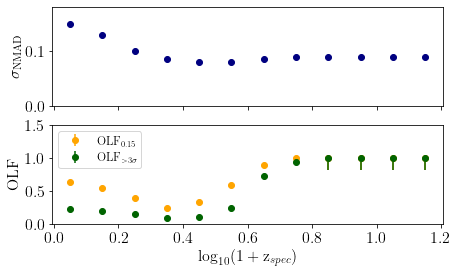

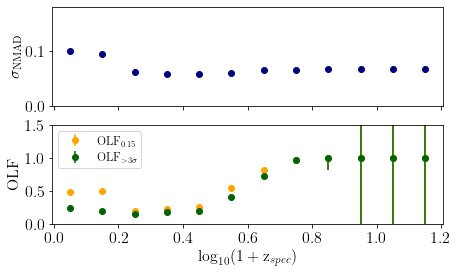

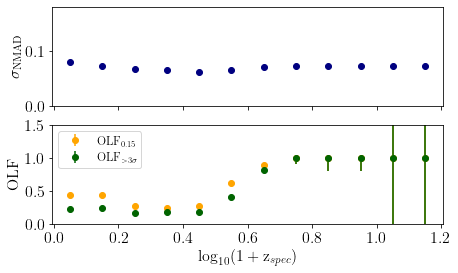

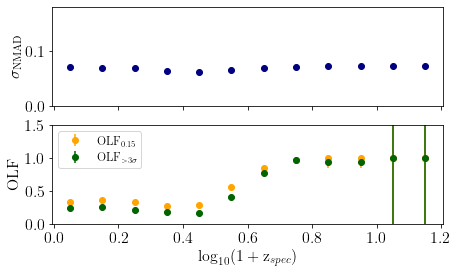

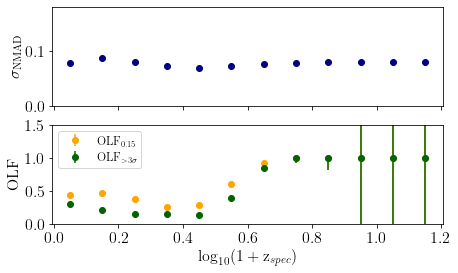

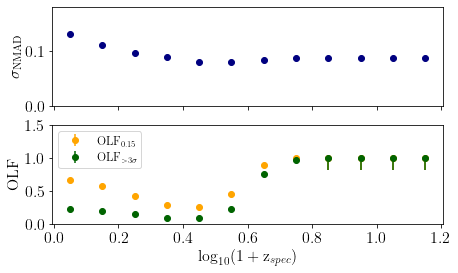

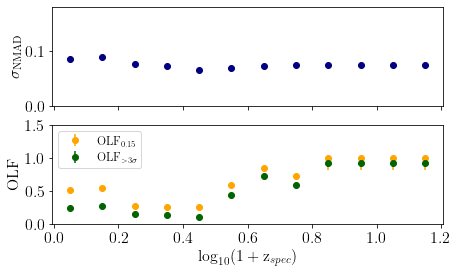

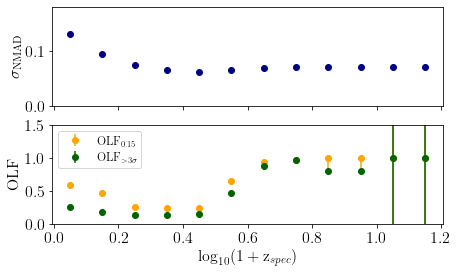

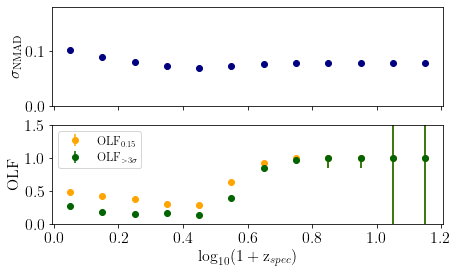

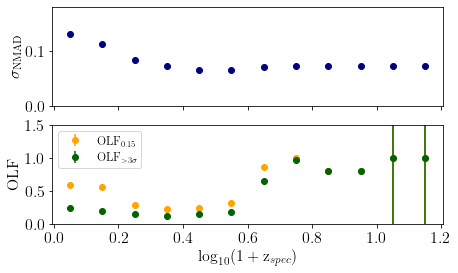

In [32]:

for i in range(len(ls)):
    sigs=[]
    olfs=[]
    olfs_sig=[]
    olfs_err_l=[]
    olfs_err_u=[]
    olfs_err_sig_l=[]

    olfs_err_sig_u=[]
    file = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_{ls[i]}_size.txt','r')
    #for _ in range(1):
    #    next(file)
    for line in file:

        splitter = re.sub("\s+",",",line.strip())
        tokens = splitter.split(',')

        sigs.append(float(tokens[7]))

        olfs.append(float(tokens[1]))
        olfs_err_l.append(float(tokens[2]))
        olfs_err_u.append(float(tokens[3]))

        olfs_sig.append(float(tokens[4]))
        olfs_err_sig_l.append(float(tokens[5]))
        olfs_err_sig_u.append(float(tokens[6]))
    file.close()

    x_vals = l+0.05

    fig,ax = plt.subplots(2,1,sharex=True,figsize = (7,4))
    ax[0].set_ylim(0,0.18)
    ax[1].set_ylim(0,1.2)
    useLatex()
    ax[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

    ax[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
    ax[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )
    ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$')
    ax[1].set_ylabel('OLF')
    ax[1].set_xlabel(r'$\text{log}_{10}(1+\text{z}_{spec})$')
    #ax[0].errorbar(x_vals[:3],outlier, marker='^',ls='none',color='navy',alpha =0.4 )


    #ax[0].set_title(f'Base Filters')
    ax[1].legend(loc = 'upper left',fontsize=12)
    ax[1].set_ylim(0,1.5)
    plt.savefig(f'MPhys/gpz_files_new/olf/size/{ls[i]}_olf.pdf',bbox_inches='tight')
    #plt.close()

### Regular

In [ ]:
for i in range(len(ls)):
    p=0
    x=[]     

    delta_z = []
    outliers = []

    logz = []
    
    
    
   # os.remove(f'MPhys/gpz_files/olf/auto/redshift_binned_olf_no_size_{ls[i]}.txt')
    file_text = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_{ls[i]}_size.txt','a')
 
    
    pred_all = Table.read(f'{ext}size/PRED/{pred_size[i]}', format = 'ascii.commented_header')
    pred_all.sort('id')
    
    gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/size/{cat_size[i]}',format = 'ascii')
    gpz_out_all.sort('col1')


    

    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
        logz.append(np.log10(1+pred_all['z_spec'][v]))

    ###


    while p<len(l):
        m=0
        k=0
        c=0
        for j in range(len(logz)):

            if l[p]<=logz[j]<=l[p]+0.1:
                    #print(logz[j])
                c+=1
                x.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
                sig_nmad = scipy.stats.median_abs_deviation(x)
        for j in range(len(logz)):
            if l[p]<=logz[j]<=l[p]+0.1:



                if abs(outliers[j])>0.15:
                    m+=1
                if abs(outliers[j])>(3*sig_nmad):
                    k+=1

        if c!=0:
            outlier_frac = m/c
            print(outlier_frac)
            err= binom_conf_interval(outlier_frac,c)
            outlier_frac_sig =k/c
            err_three_sig= binom_conf_interval(outlier_frac_sig,c)


        file_text.write(str(l[p])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','+str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+'\n')
        p+=1
        #file_text.close()

    #####


    file_text.close()   

       # w+=1

In [ ]:

for i in range(len(ls)):
    sigs=[]
    olfs=[]
    olfs_sig=[]
    olfs_err_l=[]
    olfs_err_u=[]
    olfs_err_sig_l=[]

    olfs_err_sig_u=[]
    file = open(f'MPhys/gpz_files_new/olf/size/txt_files/olf_{ls[i]}_size.txt','r')
    #for _ in range(1):
    #    next(file)
    for line in file:

        splitter = re.sub("\s+",",",line.strip())
        tokens = splitter.split(',')

        sigs.append(float(tokens[7]))

        olfs.append(float(tokens[1]))
        olfs_err_l.append(float(tokens[2]))
        olfs_err_u.append(float(tokens[3]))

        olfs_sig.append(float(tokens[4]))
        olfs_err_sig_l.append(float(tokens[5]))
        olfs_err_sig_u.append(float(tokens[6]))
    file.close()
    ####
   #
    
   # print(ls[i])
   # outlier = [0.165,0.165,0.165]
   # xx= [0.17,0.17,0.17]
    x_vals = l+0.05
   # print(x_vals[:3])
   # print(olfs)
   # print(x_vals)
    fig,ax = plt.subplots(2,1,sharex=True)
    ax[0].set_ylim(0,0.18)
    ax[1].set_ylim(0,1.2)
    ax[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

    ax[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = '$OLF_{0.15}$',ls='none')
    ax[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label ='$OLF_{>3\sigma}$' )
    ax[0].set_ylabel('$\sigma_{NMAD}$')
    ax[1].set_ylabel('OLF')
    ax[1].set_xlabel('$log_{10}(1+z_{spec})$')
    #ax[0].errorbar(x_vals[:3],outlier, marker='^',ls='none',color='navy',alpha =0.4 )


    #ax[0].set_title(f'Base Filters')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig(f'MPhys/gpz_files_new/olf/size/{ls[i]}_olf_size.png',bbox_inches='tight')
    #plt.close()

## NUMBF OLF


In [33]:
numbf = [10,40,70,100,150,200,250,300,350,400,450,500]


In [ ]:
zspec_sdss =[]


p=0



file_text = open(f'MPhys/gpz_files/olf/sdss_olf_cut.txt','a')
file_text.write('numbf, olf, olf_err_lower, olf_err_upper, olf_3sig, olf_3sig_err_lower, lf_3sig_err_upper, sig_nmad \n')

#for w in range(len(predfiles)):
#    print(w)
file= open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']
for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_sdss.append(float(tokens[10]))
#file.close()



  

In [59]:
file= open(f'gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
#file_zspec['VALUE']
zspec_sdss =[]
for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    zspec_sdss.append(float(tokens[10]))
file.close()

In [73]:
bias=[]
for nbf in numbf:
    m=0
    k=0
    delta_z_sdss= []
    outliers_sdss = []
    zphot_sdss = []
    error_sdss=[]
    x_sdss=[]

    print(nbf)
    file = open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r')
    for _ in range(11):
        next(file)
    for line in file:
        splitter_numbf = re.sub("\s+",",",line.strip())
        tokens_numbf = splitter_numbf.split(',')
        zphot_sdss.append(float(tokens_numbf[1]))
        error_sdss.append(float(tokens_numbf[2]))
    file.close()

   
    logz_sdss = []
    for i in range(len(zphot_sdss)):
        delta_z_sdss.append(float(zphot_sdss[i])-float(zspec_sdss[i])/(1+float(zspec_sdss[i])))
        #outliers_sdss.append(float(delta_z_sdss[i])/(1+float(zspec_sdss[i])))
        #logz_sdss.append(np.log10(1+zspec_sdss[i]))
        #x_sdss.append(delta_z_sdss[i]/(1+float(zspec_sdss[i])))
        
   
        #if abs(outliers_sdss[i])>0.15:
        #    m+=1
        #if abs(outliers_sdss[i])>(3*sig_nmad_sdss):
        #    k+=1


        #outlier_frac_sdss = m/len(zspec_sdss)
        #print(m)

        #err_sdss= binom_conf_interval(outlier_frac_sdss,len(zspec_sdss))
        #outlier_frac_sig_sdss =k/len(zspec_sdss)
        #err_three_sig_sdss= binom_conf_interval(outlier_frac_sig_sdss,len(zspec_sdss))

    #sig_nmad_sdss = scipy.stats.median_abs_deviation(x_sdss)
    bias.append(np.median(delta_z_sdss))
    #file_text.write(f'{nbf},'+str(outlier_frac_sdss)+','+str(err_sdss[0])+','+str(err_sdss[1])+','+str(outlier_frac_sig_sdss)+','+str(err_three_sig_sdss[0])+','+str(err_three_sig_sdss[1])+','+str( sig_nmad_sdss)+'\n')
   # p+=1


#file_text.close()   

10
40
70
100
150
200
250
300
350
400
450
500


In [ ]:
bias=[]
for nbf in numbf:
for i in range(len(zphot_sdss)):
    delta_z_sdss.append(abs(float(zphot_sdss[i])-float(zspec_sdss[i]))/float(zspec_sdss[i]))
bias.append(np.median(delta_z_sdss))

In [ ]:
print(len(zphot_sdss))

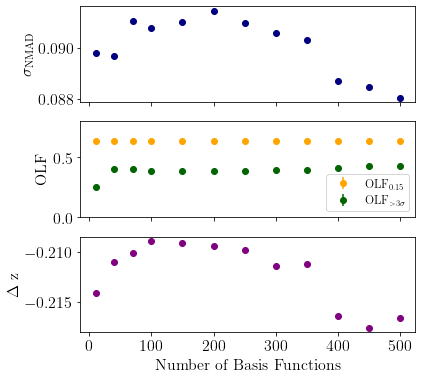

In [78]:
sigs=[]
olfs=[]
olfs_sig=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]

olfs_err_sig_u=[]

file = open('MPhys/gpz_files/olf/sdss_olf_cut.txt','r')
for _ in range(1):
    next(file)
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    sigs.append(float(tokens[7]))

    olfs.append(float(tokens[1]))
    olfs_err_l.append(float(tokens[2]))
    olfs_err_u.append(float(tokens[3]))

    olfs_sig.append(float(tokens[4]))
    olfs_err_sig_l.append(float(tokens[5]))
    olfs_err_sig_u.append(float(tokens[6]))
file.close()
####
x_vals = numbf

fig,ax = plt.subplots(3,1,sharex=True,figsize = (6,6))
ax[0].errorbar(x_vals,sigs,marker = 'o',ls='none',color='navy')

ax[1].errorbar(x_vals, olfs,yerr = (olfs_err_u,olfs_err_l),marker = 'o',color= 'orange',label = r'$\text{OLF}_{0.15}$',ls='none')
ax[1].errorbar(x_vals, olfs_sig,yerr=(olfs_err_sig_u,olfs_err_sig_l),marker = 'o',color= 'darkgreen',ls='none',label =r'$\text{OLF}_{>3\sigma}$' )

ax[2].errorbar(x_vals, bias,marker = 'o',color= 'purple',ls='none' )
ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$')
ax[1].set_ylabel('OLF')
ax[2].set_ylabel(r'$\Delta$ z')
ax[2].set_xlabel('Number of Basis Functions')
ax[1].set_ylim(0,0.8)
#ax[2].set_ylim(-0.23,0)
#ax[0].set_title(f'Base Filters')
ax[1].legend(loc='lower right',fontsize = 12)
#plt.show()
plt.savefig(f'MPhys/olf_plots/sdss_olf.png',bbox_inches='tight')
#plt.close()

## Table Construction 


In [28]:
cat = 'MPhys/gpz_files_new/cats/all/' #change from size to no_size 

In [146]:
#not zsplit
cat_size =  [f for f in listdir('MPhys/gpz_files_new/cats/all/size') if isfile(join('MPhys/gpz_files_new/cats/all/size', f))]
cat_size.sort()

cat_no_size =  [f for f in listdir('MPhys/gpz_files_new/cats/all') if isfile(join('MPhys/gpz_files_new/cats/all', f))]
cat_no_size.sort()

size =  [f for f in listdir('MPhys/base_filter_permutations/base_filter_permutations/PRED/size') if isfile(join('MPhys/base_filter_permutations/base_filter_permutations/PRED/size', f))]
size.sort()

no_size =  [f for f in listdir('MPhys/base_filter_permutations/base_filter_permutations/PRED/no_size') if isfile(join('MPhys/base_filter_permutations/base_filter_permutations/PRED/no_size', f))]
no_size.sort()


In [132]:
cat_size_highz


['bc.cat',
 'bc_size.cat',
 'f090w.cat',
 'f090w_size.cat',
 'f125w.cat',
 'f125w_size.cat',
 'f140w.cat',
 'f140w_size.cat',
 'f150w-clear.cat',
 'f150w-clear_size.cat',
 'f160w.cat',
 'f160w_size.cat',
 'f410m-clear.cat',
 'f410m-clear_size.cat',
 'f435w.cat',
 'f435w_size.cat',
 'f606w.cat',
 'f606w_size.cat',
 'f814w.cat',
 'f814w_size.cat',
 'ic.cat']

In [137]:
os.remove('MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt')
for i in range(len(ls)):
    m=0
    k=0
    c=0
    x=[]
    outliers = []
    delta_z=[]
    ins=[]
    dz=[]
    
    file_text = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','a+')
    #pred_all = Table.read(f'{ext}size/PRED/new/{pred_size[i]}', format = 'ascii.commented_header')
    #pred_all.sort('id')
    #gpz_out_all  =Table.read(f'MPhys/gpz_files_new/cats/all/size/{cat_size[i]}',format = 'ascii')
    #gpz_out_all.sort('col1')
    highp = Table.read(f'{ext}size_z_split/highz/PRED/new/{pred_size_highz[i]}', format = 'ascii.commented_header')
    highp.sort('id')
    lowp =  Table.read(f'{ext}size_z_split/lowz/PRED/new/{pred_size_lowz[i]}', format = 'ascii.commented_header')
    lowp.sort('id')
    pred_all = vstack([lowp,highp])
    highcat  =Table.read(f'MPhys/gpz_files_new/cats/highz/size/{cat_size_highz[i]}',format = 'ascii')
    highcat.sort('col1')
    lowcat  =Table.read(f'MPhys/gpz_files_new/cats/lowz/size/{cat_size_lowz[i]}',format = 'ascii')
    lowcat.sort('col1')
    gpz_out_all= vstack([lowcat,highcat])
    print(len(pred_all),len(gpz_out_all))
    
    
#olf and sigma 
    for v in range(len(pred_all)):
        delta_z.append(abs(float(gpz_out_all['col2'][v])-float(pred_all['z_spec'][v])))
        outliers.append(float(delta_z[v])/(1+float(pred_all['z_spec'][v])))
        dz.append((float(pred_all['z_spec'][v])-float(gpz_out_all['col2'][v]))/(1+float(gpz_out_all['col2'][v])))
    sig_nmad = scipy.stats.median_abs_deviation(outliers)
    bias=np.median(dz)
    for j in range(len(pred_all)):    
        ins.append(delta_z[j]/(1+float(pred_all['z_spec'][j])))
    
        if abs(outliers[j])>0.15:
            m+=1
        if abs(outliers[j])>(3*sig_nmad):
            k+=1
   
       # if c!=0:
    outlier_frac = m/len(pred_all)
    
    err= binom_conf_interval(outlier_frac,len(pred_all))
    bias_err= binom_conf_interval(bias,len(pred_all))
    outlier_frac_sig =k/len(pred_all)
    err_three_sig= binom_conf_interval(outlier_frac_sig,len(pred_all))
    print(outlier_frac)
   
    

    file_text.write(str(ls[i])+','+str(outlier_frac)+','+str(err[0])+','+str(err[1])+','+str(outlier_frac_sig)+','
                    +str(err_three_sig[0])+','+str(err_three_sig[1])+','+str( sig_nmad)+','+str(bias)+','+str(bias_err)+'\n')
file_text.close()   

    
   

3805 3805
0.29750328515111696
2963 2963
0.2713466081673979
3796 3796
0.2881981032665964
3513 3513
0.3085681753487048
3809 3809
0.30165397742189554
3798 3798
0.3048973143759874
3723 3723
0.41391351060972337
3210 3210
0.36884735202492214
3783 3783
0.302934179222839
3811 3811
0.34977696142744685
3954 3954
0.35103692463328273


In [138]:
sigs=[]
olfs=[]
olfs_sig=[]
filts=[]
olfs_err_l=[]
olfs_err_u=[]
olfs_err_sig_l=[]
olfs_err_sig_u=[]
bias=[]
file = open(f'MPhys/gpz_files_new/olf/olf_reg_av.txt','r')

for line in file:
    

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    filts.append(tokens[0])
    
    sigs.append(float(tokens[7]))
    #print(float(tokens[7]))
    olfs.append((float(tokens[1])))
    olfs_err_l.append((float(tokens[2])))
    olfs_err_u.append((float(tokens[3])))

    olfs_sig.append((float(tokens[4])))
    olfs_err_sig_l.append((float(tokens[5])))
    olfs_err_sig_u.append((float(tokens[6])))

    bias.append(float(tokens[8]))


#NO SIZE + ZSPLIT
sigs_no_size_z=[]
olfs_no_size_z=[]
olfs_sig_no_size_z=[]
olfs_no_size_z_err_l=[]
olfs_no_size_z_err_u=[]
olfs_no_size_z_err_sig_l=[]
olfs_no_size_z_err_sig_u=[]
bias_no_size_z=[]
file = open(f'MPhys/gpz_files_new/olf/olf_z_split_av.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_no_size_z = splitter.split(',')
   
    olfs_no_size_z.append(float(tokens_no_size_z[1]))
    olfs_no_size_z_err_l.append(float(tokens_no_size_z[2]))
    olfs_no_size_z_err_u.append(float(tokens_no_size_z[3]))
    olfs_no_size_z_err_sig_l.append(float(tokens_no_size_z[5]))
    olfs_no_size_z_err_sig_u.append(float(tokens_no_size_z[6]))


    olfs_sig_no_size_z.append(float(tokens_no_size_z[2]))

    sigs_no_size_z.append(float(tokens_no_size_z[7]))
    bias_no_size_z.append(float(tokens_no_size_z[8]))
   
file.close()

#SIZE ONLY 
sigs_size=[]
olfs_size=[]
olfs_sig_size=[]
olfs_err_l_size=[]
olfs_err_u_size=[]
olfs_err_sig_l_size=[]
olfs_err_sig_u_size=[]
bias_size=[]
bias_size_err=[]
file = open(f'MPhys/gpz_files_new/olf/olf_size_av.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size = splitter.split(',')
   
    olfs_size.append(float(tokens_size[1]))

    olfs_sig_size.append(float(tokens_size[4]))

    sigs_size.append(float(tokens_size[7]))
    olfs_err_l_size.append(float(tokens_size[2]))
    olfs_err_u_size.append(float(tokens_size[3]))

    olfs_err_sig_l_size.append(float(tokens_size[5]))
    olfs_err_sig_u_size.append(float(tokens_size[6]))
    bias_size.append(float(tokens_size[8]))
file.close()

#SIZE + ZSPLIT

sigs_size_z=[]
olfs_size_z=[]
olfs_sig_size_z=[]
olfs_err_l_size_z=[]
olfs_err_u_size_z=[]
olfs_err_sig_l_size_z=[]
olfs_err_sig_u_size_z=[]
bias_size_z=[]
file = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','r')

for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size_z = splitter.split(',')
   
    olfs_size_z.append(float(tokens_size_z[1]))

    olfs_sig_size_z.append(float(tokens_size_z[4]))

    sigs_size_z.append(float(tokens_size_z[7]))
    olfs_err_l_size_z.append(float(tokens_size_z[2]))
    olfs_err_u_size_z.append(float(tokens_size_z[3]))

    olfs_err_sig_l_size_z.append(float(tokens_size_z[5]))
    olfs_err_sig_u_size_z.append(float(tokens_size_z[6]))
    bias_size_z.append(float(tokens_size_z[8]))
file.close()


In [139]:
file = open(f'MPhys/gpz_files_new/olf/olf_size_av_zsplit.txt','r')
bias_size_z_err_l=[]
bias_size_z_err_u=[]
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens_size_z = splitter.split(',')
    bias_size_z_err_l.append(float(tokens_size_z[9].replace('[','')))
    bias_size_z_err_u.append(float(tokens_size_z[10].replace(']','')))
file.close()

bias_err_l=[]
bias_err_u=[]
file = open(f'MPhys/gpz_files_new/olf/olf_reg_av.txt','r')
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    bias_err_l.append(float(tokens[9].replace('[','')))
    bias_err_u.append(float(tokens[10].replace(']','')))
    
bias_err_no_size_z_l=[]
bias_err_no_size_z_u=[]    
file.close() 
file = open(f'MPhys/gpz_files_new/olf/olf_z_split_av.txt','r')
for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens_no_size_z = splitter.split(',')
    bias_err_no_size_z_l.append(float(tokens_no_size_z[9].replace('[','')))
    bias_err_no_size_z_u.append(float(tokens_no_size_z[10].replace(']','')))
file.close()    
    
    
file = open(f'MPhys/gpz_files_new/olf/olf_size_av.txt','r')
bias_err_size_l=[]
bias_err_size_u=[]
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens_size = splitter.split(',')
      
    bias_err_size_l.append(float(tokens_size[9].replace('[','')))
    bias_err_size_u.append(float(tokens_size[10].replace(']','')))
file.close()

In [140]:
n=[]
cmap = plt.get_cmap('BuPu') 
for i in np.linspace(0.3,1,4): 
    n.append(cmap(i))


In [141]:
filt_label = ['Base', 'F090W*', 'F125W', 'F140W', 'F150W', 'F160W', 'F410M**', 'F435W', 'F606W', 'F814W', 'Multi']

In [142]:
print(len(filt_label),len(sigs_size_z))
sigs_size_z

11 11


[0.059338744080866604,
 0.0517773612933633,
 0.056500082961815315,
 0.05959519565353758,
 0.057873522554134804,
 0.05831566352937177,
 0.07332337200279387,
 0.06914279650015069,
 0.058234846153701794,
 0.0662710107061318,
 0.06653194946589279]

In [143]:
sigs

[0.03699196211032359,
 0.03397221026820194,
 0.04084433679417775,
 0.04286473679398151,
 0.04865318506326995,
 0.049765341872617753,
 0.048528433417434624,
 0.048152512242035816,
 0.052393468786128564,
 0.05063954350791699,
 0.054533594043558314]

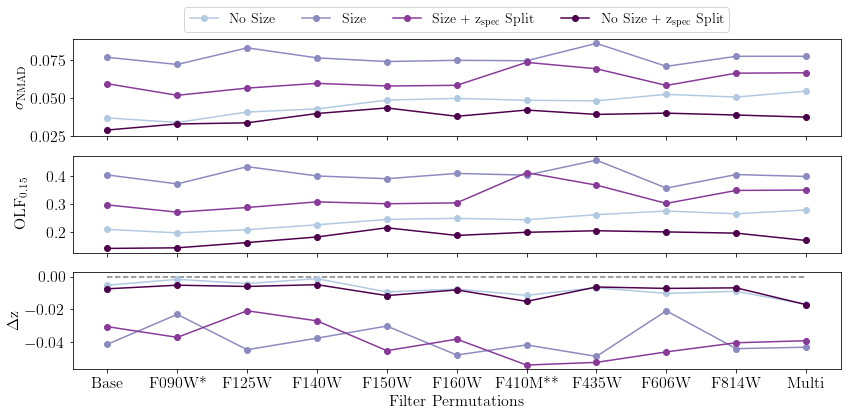

In [146]:
fig, ax = plt.subplots(3, 1,sharex=True,figsize=(12, 6))
useLatex()
plt.rcParams.update({'font.size': 14})
ax[0].errorbar(filt_label, sigs, label='No Size',marker = 'o',color = n[0])
ax[0].errorbar(filt_label, sigs_size, label='Size',marker = 'o',color=n[1])
ax[0].errorbar(filt_label, sigs_size_z, label=r'Size + $\text{z}_{\text{spec}}$ Split',marker = 'o',color=n[2])
ax[0].errorbar(filt_label, sigs_no_size_z, label=r'No Size + $\text{z}_{\text{spec}}$ Split',marker = 'o',color=n[3])
ax[0].legend(frameon=True, loc='lower center', ncol=4,bbox_to_anchor =(0.5,1))
ax[0].set_yticks([0.025,0.05,0.075])
ax[0].set_ylabel(r'$\sigma_{\text{NMAD}}$')
ax[1].errorbar(filt_label, olfs, yerr = (olfs_err_l,olfs_err_u),label='No Size',marker = 'o',color = n[0])
ax[1].errorbar(filt_label, olfs_size,yerr = (olfs_err_l_size,olfs_err_u_size), label='Size',marker = 'o',color = n[1])
ax[1].errorbar(filt_label, olfs_size_z,yerr = (olfs_err_sig_l_size_z,olfs_err_sig_u_size_z), label='Size with $z_{spec}$ Split',marker = 'o',color = n[2])
ax[1].errorbar(filt_label, olfs_no_size_z,yerr = (olfs_no_size_z_err_l,olfs_no_size_z_err_u), label='No Size with $z_{spec}$ Split',marker = 'o',color=n[3])
ax[1].set_ylabel(r'$\text{OLF}_{0.15}$',labelpad=18)
ax[1].set_yticks([0.2,0.3,0.4])
#ax[1].set_xlabel('Filter Permutations')

ax[2].errorbar(filt_label, bias,yerr = (bias_err_l,bias_err_u), label='No Size',marker = 'o',color = n[0])
ax[2].errorbar(filt_label, bias_size,yerr = (bias_err_size_l,bias_err_size_u), label='Size',marker = 'o',color = n[1])
ax[2].errorbar(filt_label, bias_size_z,yerr = (bias_size_z_err_l,bias_size_z_err_u), label='Size with $\text{z}_{spec}$ Split',marker = 'o',color = n[2])
ax[2].errorbar(filt_label, bias_no_size_z, yerr = (bias_err_no_size_z_l,bias_err_no_size_z_u),label='No Size with $z_{spec}$ Split',marker = 'o',color=n[3])
ax[2].set_ylabel(r'$\Delta \text{z}$')
ax[2].plot(filt_label,np.zeros(len(filt_label)),color='grey',linestyle='--')
ax[2].set_xlabel('Filter Permutations')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
#plt.show()
plt.savefig('MPhys/gpz_files_new/olf/sigma_olf.png',bbox_inches='tight')

## Cumulative Distribution Function 


In [ ]:
numbf=[10,40,70,100, 150, 200, 250, 300, 350, 400, 450, 500]
cbar_label=[10,100, 200, 300,  400,  500]

In [ ]:
colours=[]
cmap =  plt.get_cmap('Blues') 
for i in np.linspace(0.2,1,len(numbf)): 
    colours.append(cmap(i))


In [ ]:

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
new_cmap = truncate_colormap(cmap, 0.2, 1)

In [ ]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [20, 1]},figsize=(4,4))
fig.tight_layout()
useLatex()

p=Table.read('gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat',format='ascii.commented_header')
spec_z=p['z_spec']



for nbf,j in zip(numbf,range(len(numbf))):
    delta_z = []
    phot_z =[]
    c=[]
    uncert=[]
    with open(f'MPhys/parameter_files/gpz_{nbf}_seq_cut.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[0]))
            uncert.append(float(tokens[1]))
    file.close()
    #print(len(phot_z))
    for i in range(len(phot_z)):
        delta_z=(float(phot_z[i])-float(spec_z[i]))
        n = float(-delta_z)/(uncert[i]*np.sqrt(2))
        c.append(np.abs(math.erf(n)))

    
    ax[0].ecdf(c,color = colours[j])
x = np.linspace(0,1,10)
ax[0].plot(x,x,color='grey',linestyle='--')
ax[0].set_xlabel('c')
ax[0].set_ylabel('F(c)')
ax[0].set_xlim(0,1)
ax[0].set_ylim(0,1)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
norm = mpl.colors.Normalize(vmin=np.min(numbf), vmax=np.max(numbf))
cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap=new_cmap,norm=norm,orientation='vertical')
cb1.set_ticks(cbar_label)

plt.savefig('MPhys/parameter_plots/ECDF/numbf/all_nbf.pdf',bbox_inches='tight')

In [ ]:
#fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [20, 2]})
fig, ax = plt.subplots(1,1)
fig.tight_layout()
#for nbf in nbf_values:
    #sig = []
colours=[]
cmap = cm = plt.get_cmap('cool') 
for i in np.linspace(0,1,4): 
    colours.append(cmap(i))
j=0

k=0
while k<=3:
    delta_z = []
    outliers = []
    spec_z=[]
    phot_z =[]
    n=[]
    c=[]
    f=[]
    uncert=[]
##SIZE WITH ZSPLIT
    if k ==0:
        with open('MPhys/gpz_files/cats/size/zsplit/bc_s_lowz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()

        with open('MPhys/gpz_files/cats/size/zsplit/bc_s_highz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_lowz_size_base','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_highz_size_base','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

        if outliers[i]>0.15:
            j+=1
        outlier_frac = j/len(spec_z)
        sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))
        ax.ecdf(c,label = 'Size and Redshift Split',color = colours[0])
        k+=1
#NO SIZE AND ZSPLIT        
    elif k ==1:
        with open('MPhys/gpz_files/cats/no_size/zsplit/bc_ns_lowz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()

        with open('MPhys/gpz_files/cats/no_size/zsplit/bc_ns_highz.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_lowz_base_choice.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_highz_base_choice.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

        if outliers[i]>0.15:
            j+=1
        outlier_frac = j/len(spec_z)
        sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'No Size and Redshift Split',color = colours[1])
        k+=1
##SIZE ONLY 
    elif k==2:
        with open('MPhys/gpz_files/cats/size/bc_s.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base_size.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

            if outliers[i]>0.15:
                j+=1
            outlier_frac = j/len(spec_z)
            sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'Size Only',color=  colours[2])
   
        k+=1
    
#NO SIZE ONLY   
    elif k==3:
        with open('MPhys/gpz_files/cats/no_size/bc_ns.cat','r') as file:
            for _ in range(11):
                next(file)
            for line in file:
                test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
                tokens = test.split(',')
                #print(tokens[4])
                phot_z.append(float(tokens[1]))
                uncert.append(float(tokens[2]))
        file.close()
        file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base.cat','r')


        for _ in range(1):
            next(file)
        for line in file:
            #print(len(line))
            splitter = re.sub("\s+",",",line.strip())
            tokens = splitter.split(',')

            spec_z.append(float(tokens[4]))
        file.close()
        for i in range(len(phot_z)):
            delta_z.append(float(phot_z[i])-float(spec_z[i]))
            outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

            if outliers[i]>0.15:
                j+=1
            outlier_frac = j/len(spec_z)
            sig_nmad = 1.48*(np.median(outliers))

        for l in range(len(delta_z)):
            n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
            c.append(np.abs(math.erf(n[l])))


        ax.ecdf(c,label = 'No Size',color = colours[3])
        k+=1





    
    #print(np.mean(c))
   






    #, label = f'{nbf} Base Functions', color = colours,alpha = 0.6)
    plt.legend()
    ax.set_xlabel('c')
    ax.set_ylabel('F(c)')
    #ax[1].set_ylabel('Number of Base Functions')

    #ax.set_title('Cumulative Distribution Function \n JWST Data  split')
    x = np.linspace(0,1,10)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    #norm = mpl.colors.Normalize(vmin=np.min(nbf_values), vmax=np.max(nbf_values))
    #cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap='cool',norm=norm,orientation='vertical')



    ax.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)
  #  plt.show()
plt.savefig('MPhys/gpz_files/cdf/bc_cdf.png', bbox_inches='tight')


In [ ]:
delta_z = []
outliers = []
spec_z=[]
phot_z =[]
n=[]
c=[]
f=[]
uncert=[]
j=0
fig, ax = plt.subplots(1,1)
with open('MPhys/gpz_files/cats/size/bc_s.cat','r') as file:
        for _ in range(11):
            next(file)
        for line in file:
            test = re.sub("\s+", ",", line.strip()) #takes any spaces and replaces with comma to make split easier
            tokens = test.split(',')
            #print(tokens[4])
            phot_z.append(float(tokens[1]))
            uncert.append(float(tokens[2]))
file.close()
file= open(f'MPhys/base_filter_permutations/base_filter_permutations/PRED/PRED_filter_choice_base_size.cat','r')


for _ in range(1):
    next(file)
for line in file:
    #print(len(line))
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')

    spec_z.append(float(tokens[4]))
file.close()
for i in range(len(phot_z)):
    delta_z.append(float(phot_z[i])-float(spec_z[i]))
    outliers.append(float(delta_z[i])/(1+float(spec_z[i])))

    if outliers[i]>0.15:
        j+=1
    outlier_frac = j/len(spec_z)
    sig_nmad = 1.48*(np.median(outliers))

for l in range(len(delta_z)):
    n.append(float(-delta_z[l])/(uncert[l]*np.sqrt(2)))
    c.append(np.abs(math.erf(n[l])))


ax.ecdf(c)


plt.legend()
ax.set_xlabel('c')
ax.set_ylabel('F(c)')
#ax[1].set_ylabel('Number of Base Functions')

ax.set_title('Cumulative Distribution Function \n JWST Data  split')
x = np.linspace(0,1,10)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

#norm = mpl.colors.Normalize(vmin=np.min(nbf_values), vmax=np.max(nbf_values))
#cb1 = mpl.colorbar.ColorbarBase(ax[1], cmap='cool',norm=norm,orientation='vertical')



ax.plot(x,x,linestyle = '--', color = 'grey', alpha= 0.5)

In [ ]:


###no 
x1=[]
m=0
k=0
c=0
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:
        c+=1
print(c)
for j in range(len(logz)):
    if l[7]<=logz[j]<=l[7]+0.1:

        if abs(outliers[j])>0.15:
            m+=1
        #if abs(outliers[j])>(3*np.log10(error_stat[j])):
           # k+=1
        x1.append(delta_z[j]/(1+float(zspec_stat[j])))

sig_nmad = scipy.stats.median_abs_deviation(x1)
outlier_frac = m/c
print(l[7],outlier_frac,sig_nmad)

In [ ]:
sigs=[]
olfs=[]

file = open('MPhys/redshift_binned_olf.txt','r')
for line in file:

    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    
    sigs.append(float(tokens[1]))
    olfs.append(float(tokens[2]))

In [ ]:
x_vals = l+0.05
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].scatter(x_vals,sigs,marker = 'o')
ax[1].scatter(x_vals, olfs,marker = 'o',color= 'r')
ax[0].set_ylabel('$\sigma_{NMAD}$')
ax[1].set_ylabel('$OLF_{0.15}$')
ax[1].set_xlabel('$log_{10}(1+z_{spec})$')
ax[0].set_title(f'{filt[0]} replacing {change_filt}')

# Comparison of Matrix Types



In [4]:
zspec = []
file = open('gpzpp/gpzpp-master/example/sdss_pred_randomised_cut.cat','r')
for _ in range(1):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zspec.append(float(tokens_numbf[10]))
    
file.close()

In [5]:
##difference between diagonal and full covarience
zphot_full = []
error_full=[]
err_full=[]
file = open('gpzpp/gpzpp-master/example/gpvc_nbf10.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_full.append(float(tokens_numbf[0]))
   
    err_full.append(float(tokens_numbf[1]))

file.close()
for i in range(len(zspec)):
    error_full.append(err_full[i]/(1+zspec[i]))

In [6]:
##difference between diagonal and full covarience
zphot_diag = []
error_diag=[]
err_diag=[]
file = open('gpzpp/gpzpp-master/example/gpvd_nbf10.cat','r')
for _ in range(11):
    next(file)
for line in file:

    splitter_numbf = re.sub("\s+",",",line.strip())
    tokens_numbf = splitter_numbf.split(',')
    
    zphot_diag.append(float(tokens_numbf[0]))
    #for i in range(len(zspec)):
    err_diag.append(float(tokens_numbf[1]))

file.close()
for i in range(len(zspec)):
    error_diag.append(err_diag[i]/(1+zspec[i]))

In [ ]:
print(len(zspec),len(zphot_diag))

In [ ]:
highdiff_diag=[]
diff_diag=[]
highdiff_full=[]
diff_full=[]
#diagoanl
for i in range(len(zphot_diag)):
    diff_diag.append(abs(zphot_diag[i]-zspec[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff_diag)):
    #tst.append((zphot_diag[j]*0.02))
    if diff_diag[j]>=((1+zphot_diag[j])*0.1):
        # diff_diag[j]>0:
        highdiff_diag.append(j)
            
#full
for i in range(len(zphot_full)):
    diff_full.append(abs(zphot_full[i]-zspec[i]))
    #print((zphot_full[i]/100)*2)
for j in range(len(diff_full)):
    #tst.append((zphot_diag[j]*0.02))
    if diff_full[j]>=((1+zphot_full[j])*0.1):
        #if diff_full[j]>0:
        highdiff_full.append(j)


In [ ]:
print(len(highdiff_full),len(highdiff_diag))

In [ ]:
new_gpvd=[]
new_gpvd_err=[]
new_gpvc=[]
new_gpvc_err=[]
zspec_gpvd=[]
zspec_gpvc=[]
for k in highdiff_diag:
    #if k>0:
    new_gpvd.append(abs(zphot_diag[k]))
    new_gpvd_err.append(error_diag[k])
    zspec_gpvd.append(abs(zspec[k]))
for l in highdiff_full:
    #if k>0:        
    new_gpvc.append(abs(zphot_full[l]))
    new_gpvc_err.append(error_full[l])
    zspec_gpvc.append(abs(zspec[l]))

        
new_data_diag = np.array((new_gpvd,zspec_gpvd,new_gpvd_err ))
new_data_full = np.array((new_gpvc,zspec_gpvc,new_gpvc_err ))


In [ ]:
print(len(new_data_diag[1]),len(new_data_diag[0]))

In [ ]:

plt.hist(new_data_diag[0], bins = 30, histtype='bar',alpha=0.8,label = 'GPVD',color='navy')

plt.hist(new_data_full[0], bins = 30,histtype='bar',alpha = 0.8,label = 'GPVC',color = 'turquoise')
plt.xlim(0,1.25)
plt.xlabel('Photometric Redshift ')
plt.legend()
plt.show()

In [ ]:
fig,ax= plt.subplots(1,1)
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.hist(new_data_full[1], bins = 30,histtype='bar',alpha = 0.8,label = 'GPVC',color = 'turquoise')
ax.hist(new_data_diag[1], bins = 30, histtype='bar',alpha=0.8,label = 'GPVD',color='navy')
ax.text(0.7, 0.95, f'No. Outliers \n ={len(new_data_full[1])}', transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax.text(0.7, 0.95, f'No. Outliers \n ={len(new_data_diag[1])}', transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax.set_xlim(0,1.25)
ax.set_xlabel('Spectroscopic Redshift ')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(0,1,50)
fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
useLatex()
ax[0].hexbin(new_data_full[1] , new_data_full[0],cmap = 'autumn',bins='log')
ax[1].hexbin(new_data_diag[1] , new_data_diag[0],cmap='winter',bins='log')
ax[2].hexbin(new_data_diag[1] , new_data_diag[0],cmap='winter',bins='log',label = 'Diagonal')
ax[2].hexbin(new_data_full[1] , new_data_full[0],cmap = 'autumn',bins='log',label='Full')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')
ax[0].plot(x,x,color = 'grey',linestyle = '--')
ax[1].plot(x,x,color = 'grey',linestyle = '--')
ax[2].plot(x,x,color = 'grey',linestyle = '--')
ax[0].set_xlabel('Spectroscopic Redshift')
ax[1].set_xlabel('Spectroscopic Redshift')
ax[2].set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax[0].text(0.7, 0.95, f'No. Outliers \n ={len(new_data_full[1])}', transform=ax[0].transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax[1].text(0.7, 0.95, f'No. Outliers \n ={len(new_data_diag[1])}', transform=ax[1].transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

fig.tight_layout(pad=0.4, w_pad=2, h_pad=1.0)
plt.ylim(0,1.25)
plt.xlim(0,1.25)
plt.savefig('MPhys/diag_full_cov_difference_10pc_new.pdf',bbox_inches='tight')
#plt.close()
plt.show()

In [ ]:
x=np.linspace(0,np.max(new_data_full[0]),20)

fig,ax= plt.subplots(1,3,sharex=True,sharey=True,figsize=(10, 4))
fig.text(0.5, 0.04, 'Spectroscopic Redshift', ha='center', va='center')
#a.set_xlabel('Spectroscopic Redshift')
ax[0].set_ylabel('Photometric Redshift')
ax[0].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
ax[1].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_diag[1] , new_data_diag[0],color = 'orange',fmt='.')#,cmap='winter',bins='log')
ax[2].errorbar(new_data_full[1] , new_data_full[0],fmt='.')#,cmap = 'autumn',bins='log')
#plt.hexbin(new_data_full[0] , new_data_diag[1],bins='log')
ax[0].plot(x,x,linestyle = '--', color = 'grey')
ax[1].plot(x,x,linestyle = '--', color = 'grey')
ax[2].plot(x,x,linestyle = '--', color = 'grey')
ax[0].set_title('Full \n Covariance')
ax[1].set_title('Diagonal \n Covariance')
ax[2].set_title('Full and Diagonal \n Covariance')

plt.xlim(0,np.max(new_data_full[1]))
plt.ylim(0,np.max(new_data_full[0]))
plt.savefig('MPhys/parameter_plots/full_vs_diag.png')

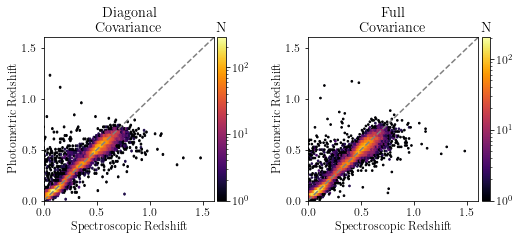

In [12]:
#fig,ax = plt.subplots(1,2,figsize=(10,5))
useLatex()
#diag = ax[0].hexbin(zspec,zphot_diag,cmap = 'inferno',bins='log',mincnt=1)
#full = ax[1].hexbin(zspec,zphot_full,cmap = 'inferno',bins='log',mincnt=1)
#ax[0].set_xlim(0,1.6)
#ax[1].set_xlim(0,1.6)
#ax[0].set_ylim(0,1.6)
#ax[1].set_ylim(0,1.6)
#ax[0].set_title('Diagonal')
#ax[1].set_title('Full')
fig = plt.figure(figsize=(8,3))
x=np.linspace(0,2,4)

ax1 = fig.add_subplot(121)
im1 = ax1.hexbin(zspec,zphot_diag,cmap = 'inferno',bins='log',mincnt=1)
ax1.set_xlim(0,1.6)
ax1.set_ylim(0,1.6)
ax1.set_title('Diagonal \n Covariance')
ax1.plot(x,x,color='grey', linestyle='--')
divider = make_axes_locatable(ax1)
ax1.set_xlabel('Spectroscopic Redshift')
ax1.set_ylabel('Photometric Redshift ')
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
clb1 = fig.colorbar(im1, cax=cax, orientation='vertical');
#fig.colorbar(label ='N')
clb1.ax.set_title('N')
ax2 = fig.add_subplot(122)
im2 = ax2.hexbin(zspec,zphot_full,cmap = 'inferno',bins='log',mincnt=1)
ax2.set_xlabel('Spectroscopic Redshift')
ax2.set_ylabel('Photometric Redshift ')
ax2.set_xlim(0,1.6)
ax2.set_ylim(0,1.6)
ax2.set_title('Full \n Covariance')
ax2.plot(x,x,color='grey', linestyle='--')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
clb2 = fig.colorbar(im2, cax=cax, orientation='vertical');
#fig.colorbar(label ='N')
clb2.ax.set_title('N')
plt.subplots_adjust(wspace=0.45, hspace=0.)

plt.savefig('MPhys/parameter_plots/covarience/comparison/comp_hexplot.pdf',bbox_inches='tight')

# GMM Stats Output 

In [55]:
sigs=[]
sigs_weight=[]
sigs_divide=[]
sigs_both=[]

nbf=[]


file = open(f'MPhys/gpz_files_new/olf/stats_file_sigma.txt','r')

for line in file:
    splitter = re.sub("\s+",",",line.strip())
    tokens = splitter.split(',')
    nbf.append(tokens[0])
    
    
    sigs.append(float(tokens[1]))
    #print(float(tokens[7]))
    sigs_weight.append((float(tokens[2])))
    sigs_divide.append((float(tokens[3])))
    sigs_both.append((float(tokens[4])))
file.close()

In [56]:
nbf

['10',
 '20',
 '30',
 '40',
 '50',
 '60',
 '70',
 '80',
 '90',
 '100',
 '150',
 '200',
 '250',
 '300',
 '350',
 '400',
 '450',
 '500']

In [57]:
olfs=[]
olfs_weight=[]
olfs_divide=[]
olfs_both=[]

olfs_err=[]
olfs_weight_err=[]
olfs_divide_err=[]
olfs_both_err=[]
file = open(f'MPhys/gpz_files_new/olf/stats_file_olf.txt','r')

for line in file:
    
   # splitter = re.sub("\s+",",",line.strip())
    tokens = line.split(',')
   
    
    olfs.append(float(tokens[1]))
    #print(float(tokens[7]))
    olfs_weight.append((float(tokens[3])))
    olfs_divide.append((float(tokens[5])))
    olfs_both.append((float(tokens[7])))
    
    olfs_err.append(tokens[2])
    #print(float(tokens[7]))
    olfs_weight_err.append(tokens[4])
    olfs_divide_err.append(tokens[6])
    olfs_both_err.append(tokens[8])
file.close()

In [58]:
simple_l =[]
simple_u=[]

weighted_l =[]
weighted_u=[]

divide_l =[]
divide_u=[]

both_l =[]
both_u=[]
for i in range(len(olfs_err)):
    splitter = re.sub("\s+",",",olfs_err[i].strip())
    tokens = splitter.split(',')
   # simple_l.append(tokens[0])
    simple_u.append(float(tokens[1].replace(']','')))
    simple_l.append(float(tokens[0].replace('[','')))
    
    splitter_weight = re.sub("\s+",",",olfs_weight_err[i].strip())
    tokens_weight = splitter_weight.split(',')
    weighted_l.append(float(tokens_weight[0].replace('[','')))
    weighted_u.append(float(tokens_weight[1].replace(']','')))
    
    splitter_divide = re.sub("\s+",",",olfs_divide_err[i].strip())
    tokens_divide = splitter_divide.split(',')
    divide_l.append(float(tokens_divide[0].replace('[','')))
    divide_u.append(float(tokens_divide[1].replace(']','')))
    
    splitter_both = re.sub("\s+",",",olfs_both_err[i].strip())
    tokens_both = splitter_both.split(',')
    both_l.append(float(tokens_both[0].replace('[','')))
    both_u.append(float(tokens_both[1].replace(']','')))
print(both_u)

[0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165, 0.000394167165]


In [59]:
simp_dz =[]
simp_dz_err=[]


weight_dz =[]
weight_dz_err=[]


divide_dz =[]
divide_dz_err=[]


both_dz =[]
both_dz_err=[]

file = open(f'MPhys/gmm_cats/bias_nbf.txt','r')

for line in file:
    #print(line)
    tokens = line.split(',')
    #print(tokens[2])
    simp_dz.append(float(tokens[1]))
    #simp_dz_err.append(tokens[2])
    
    weight_dz.append(float(tokens[3]))
    #weight_dz_err.append(tokens[3])
    
    divide_dz.append(float(tokens[5]))
    #divide_dz_err.append(tokens[5])
    
    both_dz.append(float(tokens[7]))
    #both_dz_err.append(tokens[7])


In [108]:
s_low = Table.read('MPhys/gmm_cats/simple_stats_nbf10-100.csv',format='csv')
s_high = Table.read('MPhys/gmm_cats/simple_stats_nbf100-500.csv',format='csv')
simple = vstack([s_low,s_high])

w_low = Table.read('MPhys/gmm_cats/weight_stats_nbf10-100.csv',format='csv')
w_high = Table.read('MPhys/gmm_cats/weight_stats_nbf100-500.csv',format='csv')
weight = vstack([w_low,w_high])

divide_low = Table.read('MPhys/gmm_cats/divide_stats_nbf10-100.csv',format='csv')
divide_high = Table.read('MPhys/gmm_cats/divide_stats_nbf100-500.csv',format='csv')
divide = vstack([divide_low,divide_high])

c_low = Table.read('MPhys/gmm_cats/combined_stats_nbf10-100.csv',format='csv')
c_high = Table.read('MPhys/gmm_cats/combined_stats_nbf100-500.csv',format='csv')
combined = vstack([c_low,c_high])

In [83]:
nbf = simple['nbf']
xticks =[]
for i in nbf:
    xticks.append(int(i))
xs=np.linspace(0,500,len(nbf))


NameError: name 'simple' is not defined

In [6]:
col=[]
cmap = plt.get_cmap('YlOrRd') 
for i in np.linspace(0.3,0.9,4): 
    col.append(cmap(i))

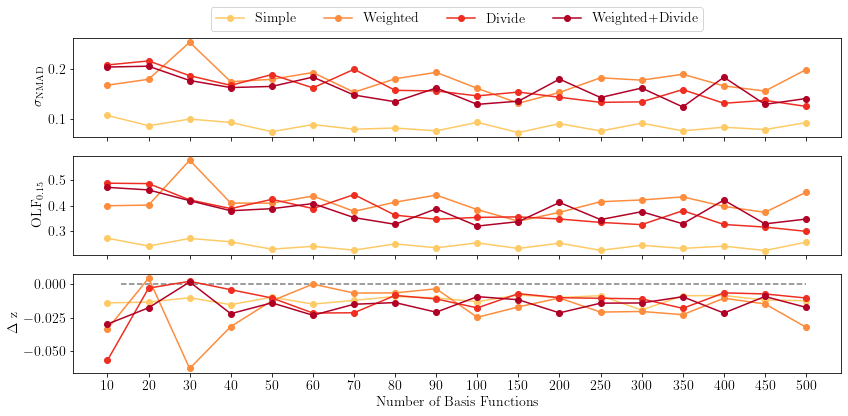

In [137]:
fig, ax = plt.subplots(3, 1,sharex=True,figsize=(12, 6))
ax[2].set_xticks(xs)
ax[2].set_xticklabels(xticks)
useLatex()
plt.rcParams.update({'font.size': 14})
ax[0].errorbar(xs, simple['sigma'], label='Simple',marker = 'o',color = col[0])
ax[0].errorbar(xs, weight['sigma'], label='Weighted',marker = 'o',color=col[1])
ax[0].errorbar(xs, divide['sigma'], label='Divide',marker = 'o',color=col[2])
ax[0].errorbar(xs, combined['sigma'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[0].legend(frameon=True, loc='lower center', ncol=4,bbox_to_anchor =(0.5,1),fontsize=14)
ax[0].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
plt.rcParams.update({'font.size': 14})
ax[1].errorbar(xs, simple['olf'] ,label='Simple',marker = 'o',color = col[0])
ax[1].errorbar(xs, weight['olf'], label='Weighted',marker = 'o',color = col[1])
ax[1].errorbar(xs, divide['olf'], label='Divide',marker = 'o',color = col[2])
ax[1].errorbar(xs, combined['olf'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[1].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
plt.rcParams.update({'font.size': 14})
ax[2].errorbar(xs, simple['bias'], label='Simple',marker = 'o',color = col[0])
ax[2].errorbar(xs,weight['bias'], label='Weighted',marker = 'o',color=col[1])
ax[2].errorbar(xs,divide['bias'], label='Divide',marker = 'o',color=col[2])
ax[2].errorbar(xs,combined['bias'], label='Weighted+Divide',marker = 'o',color=col[3])
ax[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax[2].plot(nbf,np.zeros(len(nbf)),color='grey',linestyle='--')
ax[2].set_xlabel('Number of Basis Functions',fontsize=14)

plt.tight_layout()
plt.savefig('MPhys/gpz_files_new/olf/primer_nbf_olf_gmm.pdf')
plt.show()

# GMM Features Stats


In [175]:
gmm = Table.read('MPhys/gmm_cats/stats_table_bc.fits',format='fits')
gmm.sort('permutation')
x = gmm['permutation']
xticks_gmm =[0,]
for i in x:
    xticks_gmm.append(int(i))
xs_gmm=np.arange(0,14,1)
xs_gmm

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

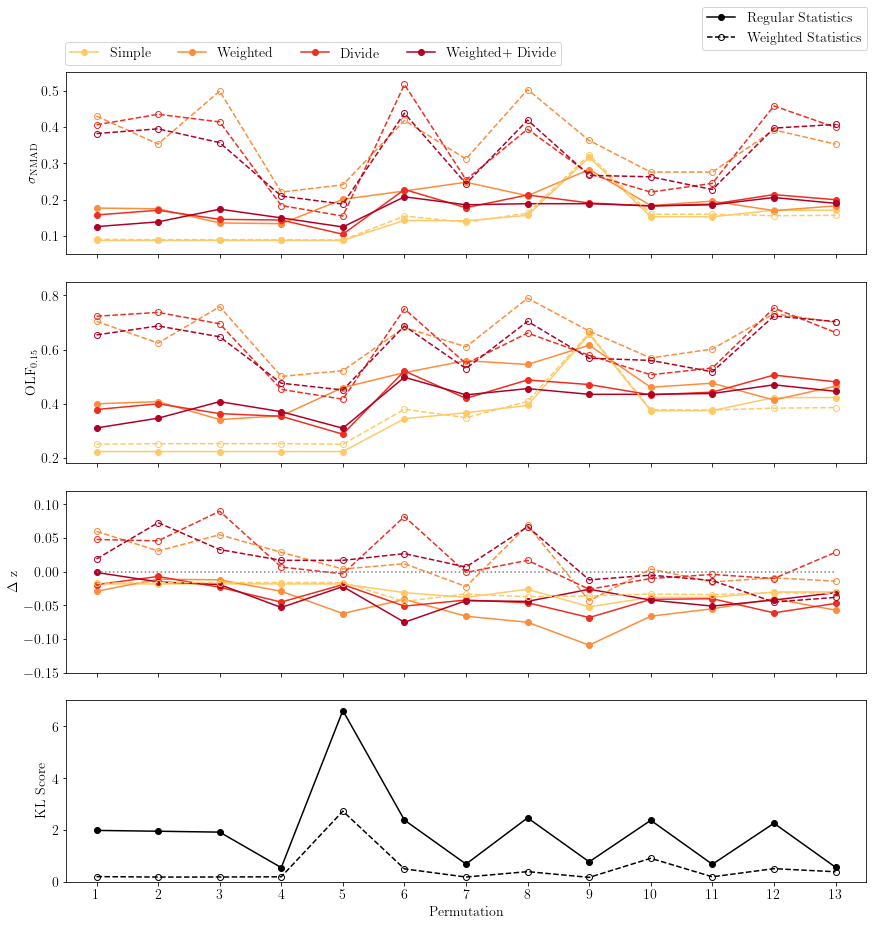

In [176]:
fig, ax = plt.subplots(4,1,figsize=(12,12),sharex=True)
fig.tight_layout()

ax[0].plot(x,gmm['simp_sig'],marker = 'o',color = col[0],label = 'Simple')
ax[0].plot(x,gmm['weight_sig'],marker = 'o',color = col[1],label = 'Weighted')
ax[0].plot(x,gmm['div_sig'],marker = 'o',color = col[2],label = 'Divide')
ax[0].plot(x,gmm['comb_sig'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

ax[0].plot(x,gmm['simp_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
ax[0].plot(x,gmm['weight_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[0].plot(x,gmm['div_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[0].plot(x,gmm['comb_sig_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax[1].plot(x,gmm['simp_olf'],marker = 'o',color = col[0])
ax[1].plot(x,gmm['weight_olf'],marker = 'o',color = col[1])
ax[1].plot(x,gmm['div_olf'],marker = 'o',color = col[2])
ax[1].plot(x,gmm['comb_olf'],marker = 'o',color = col[3])

ax[1].plot(x,gmm['simp_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[0])
ax[1].plot(x,gmm['weight_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[1].plot(x,gmm['div_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[1].plot(x,gmm['comb_olf_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax[2].plot(x,gmm['simp_bias'],marker = 'o',color = col[0])
ax[2].plot(x,gmm['weight_bias'],marker = 'o',color = col[1])
ax[2].plot(x,gmm['div_bias'],marker = 'o',color = col[2])
ax[2].plot(x,gmm['comb_bias'],marker = 'o',color = col[3])

ax[2].plot(x,gmm['simp_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[0])
ax[2].plot(x,gmm['weight_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
ax[2].plot(x,gmm['div_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
ax[2].plot(x,gmm['comb_bias_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])
ax[2].plot(x,np.zeros(len(x)),color='grey',linestyle='dotted')

ax[3].plot(x,gmm['kl'],marker = 'o',color = 'k',label = 'Regular Statistics')
ax[3].plot(x,gmm['kl_weight'],marker = 'o',fillstyle = 'none',linestyle = '--',color = 'k',label = 'Weighted Statistics')

ax[0].legend(frameon=True, loc='lower left', ncol=4,bbox_to_anchor =(-0.01,1),fontsize=14)
ax[3].legend(frameon=True, loc='lower right', ncol=1,bbox_to_anchor =(1.01,4.54),fontsize=14)

ax[0].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
ax[1].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
ax[2].set_ylabel(r'$\Delta$ z',fontsize=14)
ax[3].set_ylabel('KL Score',fontsize=14)

ax[3].set_xlabel('Permutation')
ax[3].set_xticks(xs_gmm)
ax[3].set_xticklabels(xticks_gmm)
ax[3].set_xlim(0.5,13.5)

ax[0].set_ylim(0.05,0.55)
ax[1].set_ylim(0.18,0.85)
ax[2].set_ylim(-0.15,0.12)
ax[3].set_ylim(0,7)
#plt.show()
plt.savefig('MPhys/gmm_cats/plots/ALL_STATS_WEIGHTED_bc.pdf',bbox_inches='tight')

# NSplits GMM

In [10]:
ns_simple = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_weight = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_divide = Table(names=('N','sig','sig_w','olf','olf_w'))
ns_both = Table(names=('N','sig','sig_w','olf','olf_w'))

In [79]:
ns_divide.add_row((10,0.114,0.372,0.277,0.632))

In [72]:
ns_both

N,sig,sig_w,olf,olf_w
float64,float64,float64,float64,float64
3.0,0.137,0.358,0.331,0.656
4.0,0.135,0.372,0.324,0.63
5.0,0.154,0.348,0.364,0.646
6.0,0.15,0.391,0.35,0.685
7.0,0.145,0.377,0.365,0.612
8.0,0.225,0.348,0.508,0.685
9.0,0.108,0.333,0.287,0.599
10.0,0.136,0.416,0.316,0.689


In [80]:
ns_divide.write('MPhys/gmm_cats/nsplit_divide_stats.cat',format = 'ascii.commented_header',overwrite=True)

In [4]:
ns_simple = Table.read('MPhys/gmm_cats/nsplit_simple_stats.cat',format = 'ascii.commented_header')
ns_weight = Table.read('MPhys/gmm_cats/nsplit_weight_stats.cat',format = 'ascii.commented_header')
ns_divide = Table.read('MPhys/gmm_cats/nsplit_divide_stats.cat',format = 'ascii.commented_header')
ns_both = Table.read('MPhys/gmm_cats/nsplit_both_stats.cat',format = 'ascii.commented_header')

In [13]:
ns_simple.sort('N')
ns_divide.sort('N')
ns_weight.sort('N')
ns_both.sort('N')



N,sig,sig_w,olf,olf_w
float64,float64,float64,float64,float64
1.0,0.147,0.344,0.325,0.625
2.0,0.123,0.364,0.271,0.619
3.0,0.152,0.373,0.362,0.672
4.0,0.129,0.324,0.287,0.633
5.0,0.162,0.403,0.399,0.708
6.0,0.131,0.416,0.33,0.698
7.0,0.153,0.377,0.363,0.667
8.0,0.164,0.382,0.403,0.649
9.0,0.121,0.382,0.307,0.636


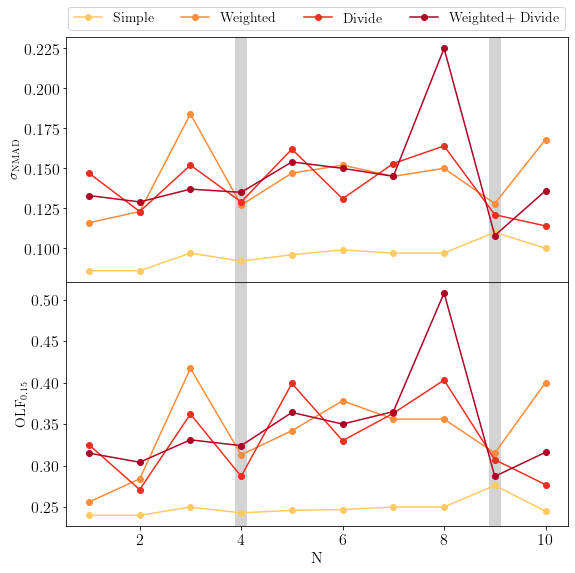

In [11]:
fig, ax = plt.subplots(2, 1,sharex=True,figsize=(9, 9))
#ax[2].set_xticks(xs)
#ax[2].set_xticklabels(xticks)
useLatex()
ax[0].axvline(4,color = 'lightgrey',lw = 12)
ax[1].axvline(4,color = 'lightgrey',lw = 12)
ax[0].axvline(9,color = 'lightgrey',lw = 12)
ax[1].axvline(9,color = 'lightgrey',lw = 12)
ns= ns_simple['N']
ax[0].plot(ns,ns_simple['sig'],marker = 'o',color = col[0],label = 'Simple')
ax[0].plot(ns,ns_weight['sig'],marker = 'o',color = col[1],label = 'Weighted')
ax[0].plot(ns,ns_divide['sig'],marker = 'o',color = col[2],label = 'Divide')
ax[0].plot(ns,ns_both['sig'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

#ax[0].plot(ns,ns_simple['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
#ax[0].plot(ns,ns_weight['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
#ax[0].plot(ns,ns_divide['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
#ax[0].plot(ns,ns_both['sig_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])

ax[1].plot(ns,ns_simple['olf'],marker = 'o',color = col[0],label = 'Simple')
ax[1].plot(ns,ns_weight['olf'],marker = 'o',color = col[1],label = 'Weighted')
ax[1].plot(ns,ns_divide['olf'],marker = 'o',color = col[2],label = 'Divide')
ax[1].plot(ns,ns_both['olf'],marker = 'o',color = col[3],label = 'Weighted+ Divide')

#ax[1].plot(ns,ns_simple['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color=col[0])
#ax[1].plot(ns,ns_weight['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[1])
#ax[1].plot(ns,ns_divide['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[2])
#ax[1].plot(ns,ns_both['olf_w'],marker = 'o',fillstyle = 'none',linestyle = '--',color = col[3])


ax[0].legend(frameon=True, loc='lower left', ncol=4,bbox_to_anchor =(-0.01,1),fontsize=14)
ax[0].set_ylabel(r'$\sigma_{\rm{NMAD}}$',fontsize=14)
ax[1].set_ylabel(r'$\text{OLF}_\text{0.15}$',fontsize=14)
ax[1].set_xlabel('N')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('MPhys/gmm_cats/plots/N_choice_lines.pdf',bbox_inches='tight')
#ax[1].legend(frameon=True, loc='lower right', ncol=1,bbox_to_anchor =(1.01,4.54),fontsize=14)